In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
time = 5 #in seconds
samp_rate = 1e5
pulse_freq = 5
chirp_maxfreq = 1000
clock = np.arange(samp_rate*time)

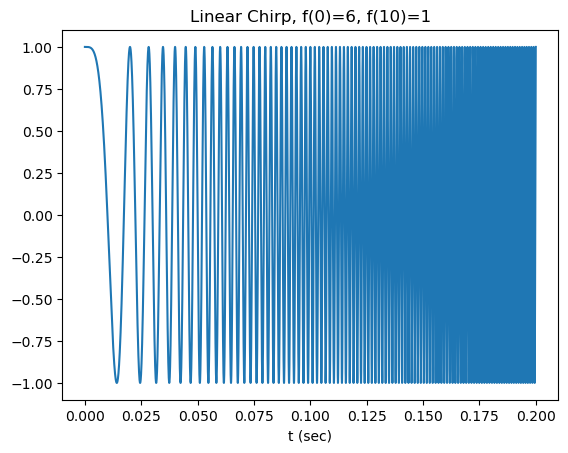

In [3]:
t = np.linspace(0, 1/pulse_freq, int(samp_rate/pulse_freq))

w = scipy.signal.chirp(t, f0=0, f1=chirp_maxfreq, t1=1/pulse_freq, method='linear')

plt.plot(t, w)

plt.title("Linear Chirp, f(0)=6, f(10)=1")

plt.xlabel('t (sec)')

plt.show()

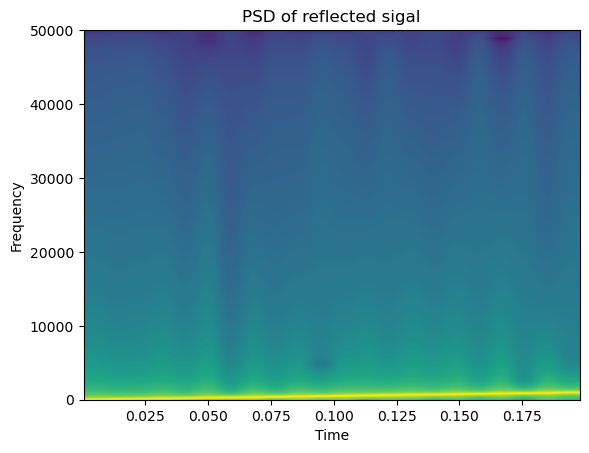

In [4]:
plt.specgram(w, NFFT=1024, Fs=samp_rate)
plt.title("PSD of reflected sigal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show() 

In [5]:
sig1 = w[1000:11000]
sig2 = w[6000:16000]

In [6]:
corr = scipy.signal.correlate(sig1, sig2)

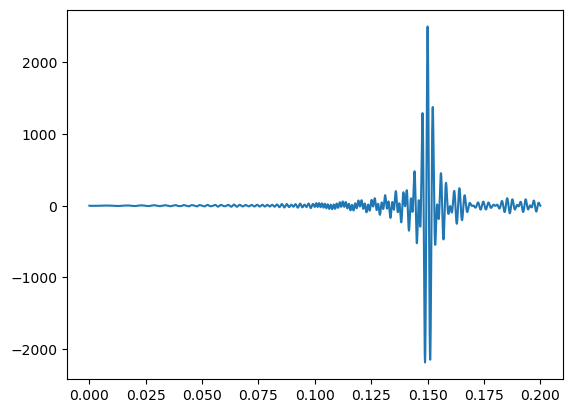

In [7]:
plt.plot(t[:-1], corr)

In [8]:
def plot_spectrogram(title, w, fs):

    ff, tt, Sxx = scipy.signal.spectrogram(w, fs=fs, nperseg=256, nfft=576)

    fig, ax = plt.subplots()

    ax.pcolormesh(tt, ff[:145], Sxx[:145])

    ax.set_title(title)

    ax.set_xlabel('t (sec)')

    ax.set_ylabel('Frequency (Hz)')

    ax.grid(True)

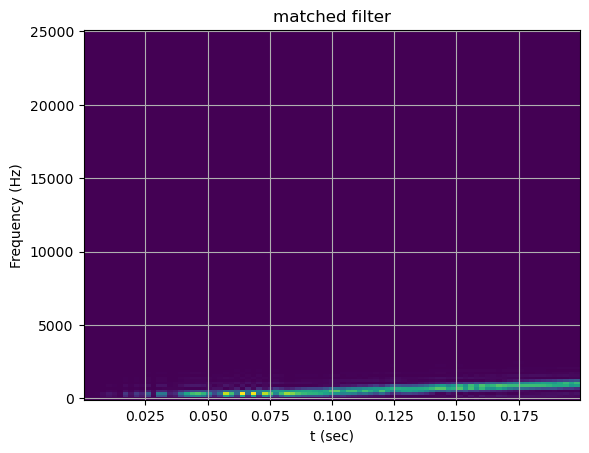

In [9]:
plot_spectrogram("matched filter", w, samp_rate)

In [10]:
w_pad1 = np.pad(w, (int(samp_rate/pulse_freq), int(samp_rate/pulse_freq)), "constant", constant_values = (0,0))

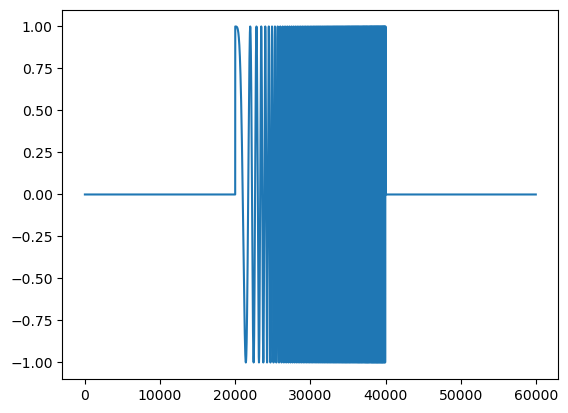

In [11]:
plt.plot(np.arange(len(w_pad1)), w_pad1)

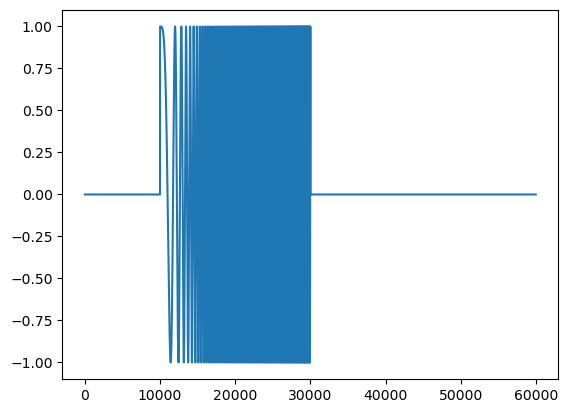

In [12]:
w_pad2 = np.pad(w, (int(samp_rate/pulse_freq-10000), int(samp_rate/pulse_freq+10000)), "constant", constant_values = (0,0))
plt.plot(np.arange(len(w_pad2)), w_pad2)

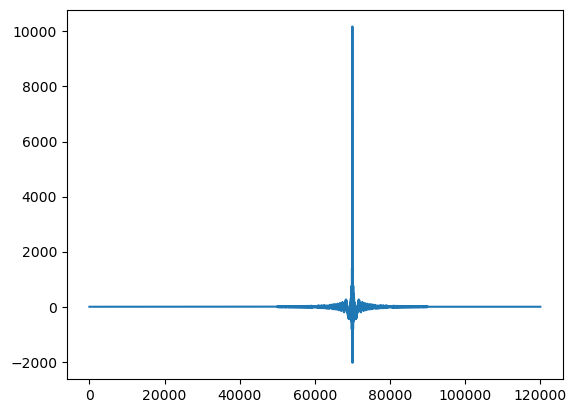

In [13]:
corr = scipy.signal.correlate(w_pad1, w_pad2)
plt.plot(np.arange(len(corr)), corr)

In [14]:
padded_chirps1 = np.concatenate((w_pad1, w_pad1))

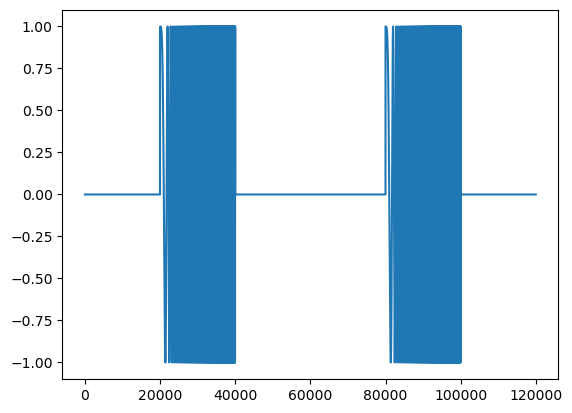

In [15]:
plt.plot(np.arange(len(padded_chirps1)), padded_chirps1)


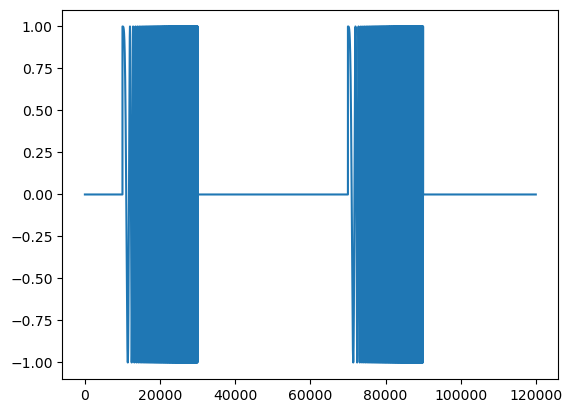

In [16]:
padded_chirps2 = np.concatenate((w_pad2, w_pad2))
plt.plot(np.arange(len(padded_chirps2)), padded_chirps2)


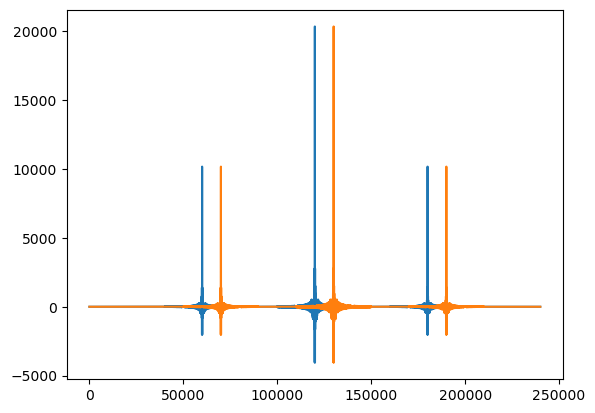

In [17]:
corr1 = scipy.signal.correlate(padded_chirps1, padded_chirps1)
corr2 = scipy.signal.correlate(padded_chirps1, padded_chirps2)
plt.plot(np.arange(len(corr1)), corr1)
plt.plot(np.arange(len(corr2)), corr2)

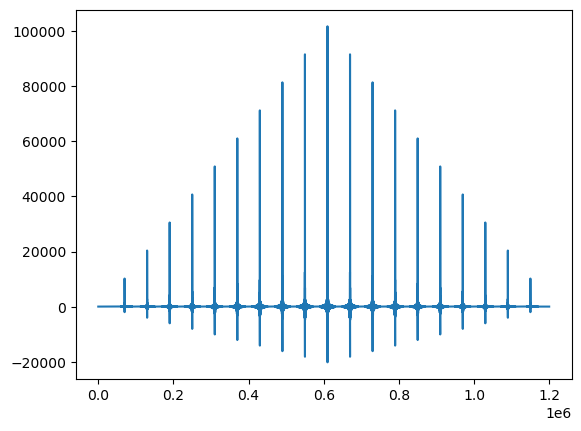

In [18]:
chirps10_1 = np.concatenate((w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1))
chirps10_2 = np.concatenate((w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2))
corr = scipy.signal.correlate(chirps10_1, chirps10_2)
plt.plot(np.arange(len(corr)), corr)

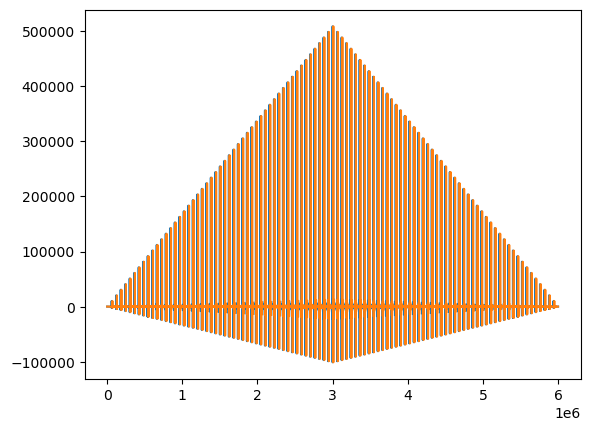

In [19]:
chirps50_1 = np.concatenate((w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1, w_pad1))
chirps50_2 = np.concatenate((w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2, w_pad2))
corr = scipy.signal.correlate(chirps50_1, chirps50_1)
corr2 = scipy.signal.correlate(chirps50_1, chirps50_2)
plt.plot(np.arange(len(corr)), corr)
plt.plot(np.arange(len(corr2)), corr2)

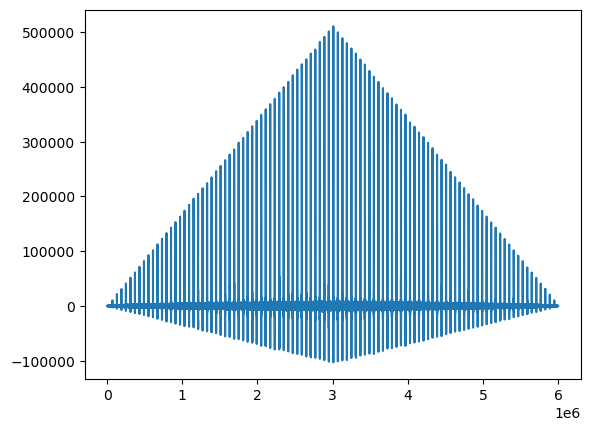

In [20]:
rng = np.random.default_rng()

chirps50_1_noisy = chirps50_1 + np.random.standard_normal(len(chirps50_1))
chirps50_2_noisy = chirps50_2 + rng.standard_normal(len(chirps50_2))
corr = scipy.signal.correlate(chirps50_1_noisy, chirps50_2_noisy)
plt.plot(np.arange(len(corr)), corr)

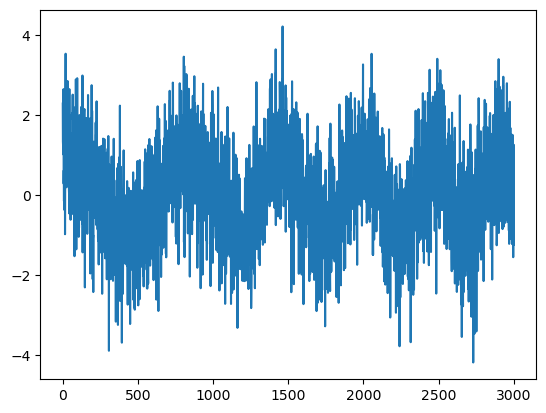

In [21]:
plt.plot(np.arange(len(chirps50_2_noisy[12000:15000])), chirps50_2_noisy[12000:15000])

chirps1m_1_noisy = np.tile(w_pad1, 200) 
chirps1m_2_noisy = np.tile(w_pad2, 200) + rng.standard_normal(len(np.tile(w_pad2, 200)))
corr = scipy.signal.correlate(chirps1m_1_noisy, chirps1m_2_noisy)
plt.plot(np.arange(len(corr)), corr)

plt.plot(np.arange(len(chirps1m_1_noisy)), chirps1m_1_noisy)

In [22]:
chirps = np.tile(w, 10)
chirps_pad1 = np.pad(chirps, (10000, 10000), "constant", constant_values = (0,0))
chirps_pad2 = np.pad(chirps, (11000, 9000), "constant", constant_values = (0,0))

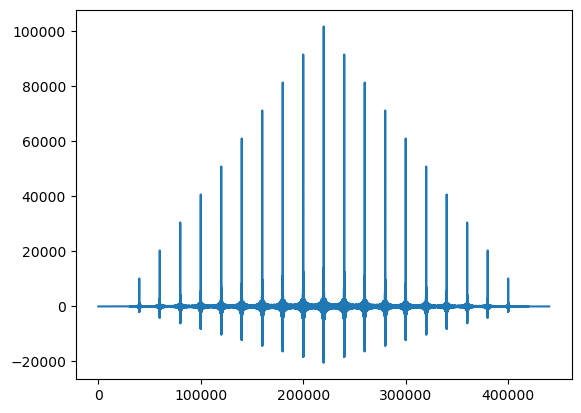

In [23]:
corr = scipy.signal.correlate(chirps_pad1, chirps_pad1)
plt.plot(np.arange(len(corr)), corr)

In [31]:
sig1 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out0_log"), dtype="complex64")[11000000:11002400]# Create a subplot for each file
sig2 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out1_log"), dtype="complex64")[11000000:11002400]# Create a subplot for each file

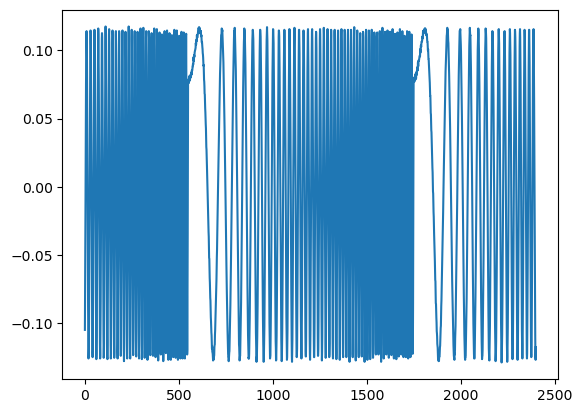

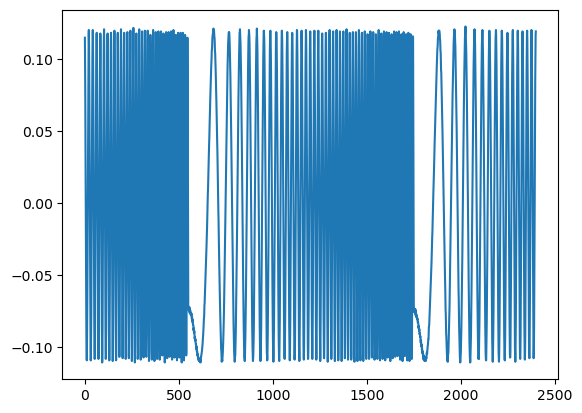

In [32]:
plt.plot(np.arange(len(sig1)), sig1)
plt.show()
plt.plot(np.arange(len(sig2)), sig2)
plt.show()

In [36]:
corr = scipy.signal.correlate(sig1, -sig2)
self_corr = scipy.signal.correlate(sig2, sig2)

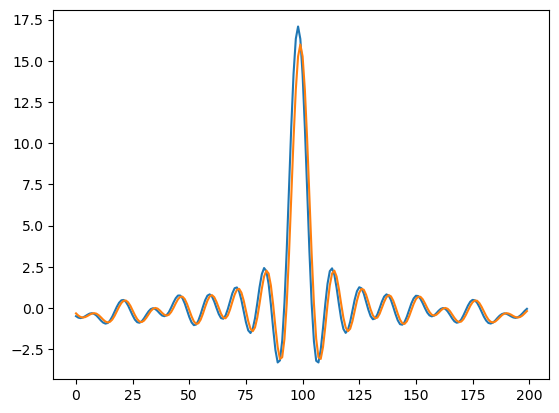

In [37]:
plt.plot(np.arange(len(corr[2300:2500])), corr[2300:2500])
plt.plot(np.arange(len(corr[2300:2500])), self_corr[2300:2500])